<a href="https://colab.research.google.com/github/mahesh-from-sirsi/All_My_AI_Work/blob/main/Module4_Agents101_04_Notebook1_ReAct_Agent_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReAct Agent with Langgraph

In this notebook, we'll explore how to build a ReAct (Reasoning and Acting) agent using LangGraph. ReAct agents combine language model reasoning with action execution to solve complex tasks. We'll demonstrate how to create and configure a ReAct agent that can perform web searches and basic calculations while maintaining a structured thought process.


In [ ]:
%pip install langchain-core langchain-community langgraph langchain-openai  langchain-google-genai duckduckgo-search ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = "sA"

### Example 1

In [ ]:
from langchain.tools import DuckDuckGoSearchResults
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool

# Initialize the DuckDuckGo search tool
search_tool = DuckDuckGoSearchResults()

# Define the calculator tool
@tool
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model = "gpt-4o-mini")

tools = [multiply, search_tool]

graph = create_react_agent(model, tools=tools)

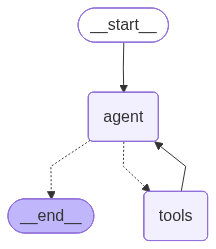

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"messages": [("user", "what is the 5 times the current age of Shahrukh Khan?")]}

response = graph.invoke(inputs)

for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the 5 times the current age of Shahrukh Khan?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_results_json (call_3uxWYYTuTXZJlPJ6iiswBofF)
 Call ID: call_3uxWYYTuTXZJlPJ6iiswBofF
  Args:
    query: current age of Shahrukh Khan
================================= Tool Message =================================
Name: duckduckgo_results_json

snippet: Khans of Bollywood. List of awards and nominations received by Shah Rukh Khan . Footnotes. ^ Khan 's official name is Shahrukh as per his business filings.[1][2] Shah Rukh is his preferred stylisation., title: Shah Rukh Khan - Wikipedia, link: https://en.wikipedia.org/wiki/Shah_Rukh_Khan, snippet: Nov 2, 2024 — Date of Birth, 2 November 1965 (Tuesday) ; Age (as of 2024), 59 Years ; Birthplace, New Delhi ; Zodiac sign, Scorpio., title: Shah Rukh Khan Height, Age, Wife, Family, Children ..., link: htt

### Example 2

In [ ]:
from langchain_core.tools import tool
import math

@tool
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


# Create two new tools
@tool
def square_root(a: int) -> float:
    """Calculate the square root of a number.

    Args:
        a: number to find square root of
    """
    return math.sqrt(a)

@tool
def power(base: int, exponent: int) -> int:
    """Raise base to the given exponent power.

    Args:
        base: the base number
        exponent: the power to raise to
    """
    return base ** exponent

# Create list of tools to use
tools = [multiply, square_root, power]



In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model = "gpt-4o")

graph = create_react_agent(model, tools=tools)

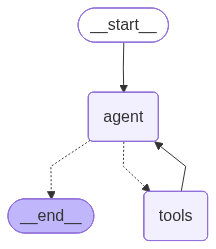

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"messages": [("user", "what is the square root of 4 raised to the power of 10 multiplied by 5?")]}

response = graph.invoke(inputs)

for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the square root of 4 raised to the power of 10 multiplied by 5?
================================== Ai Message ==================================

To solve this, I will perform the following steps:

1. Calculate the square root of 4.
2. Raise the result to the power of 10.
3. Multiply the result by 5.

Let's begin by performing these calculations in parallel.
Tool Calls:
  square_root (call_qqbnQjZuHtZx2FcJLD04VAwN)
 Call ID: call_qqbnQjZuHtZx2FcJLD04VAwN
  Args:
    a: 4
  multiply (call_VHWcD8szhnxDr9u1YDc6pCiw)
 Call ID: call_VHWcD8szhnxDr9u1YDc6pCiw
  Args:
    a: 5
    b: 1
================================= Tool Message =================================
Name: square_root

2.0
================================= Tool Message =================================
Name: multiply

5
================================== Ai Message ==================================
Tool Calls:
  power (call_PRUAiQuxTBYY6VE

In [ ]:
inputs = {"messages": [("user", "what is the 6 multipled by 4 then raised to the power of 2?")]}

response = graph.invoke(inputs)

for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the 6 multipled by 4 then raised to the power of 2?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_GOUAdFHfHCzx9pYRtI6pbFig)
 Call ID: call_GOUAdFHfHCzx9pYRtI6pbFig
  Args:
    a: 6
    b: 4
  power (call_hq5NeuCplvasZPCyM8FCFv8A)
 Call ID: call_hq5NeuCplvasZPCyM8FCFv8A
  Args:
    base: 24
    exponent: 2
================================= Tool Message =================================
Name: multiply

24
================================= Tool Message =================================
Name: power

576
================================== Ai Message ==================================

The result of 6 multiplied by 4 is 24, and when 24 is raised to the power of 2, the result is 576.
